In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

We have 10 categorical features  and 16 Numerical Features.



In [ ]:

df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [ ]:

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There is No Null values.

In [ ]:
df.drop('car_ID',axis=1,inplace=True)

In [ ]:

df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
df.nunique()

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df.groupby(['CarName','fueltype','doornumber','price']).size().reset_index()

,CarName,fueltype,doornumber,price,0
0,Nissan versa,gas,two,5499.0,1
1,alfa-romero Quadrifoglio,gas,two,16500.0,1
2,alfa-romero giulia,gas,two,13495.0,1
3,alfa-romero stelvio,gas,two,16500.0,1
4,audi 100 ls,gas,four,13950.0,1
...,...,...,...,...,...
200,volvo 264gl,gas,four,18420.0,1
201,volvo 264gl,gas,four,22625.0,1
202,volvo diesel,gas,four,18950.0,1
203,vw dasher,gas,two,11595.0,1


In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.duplicated().any().sum()

0

There is No duplicate value.

## Visualization

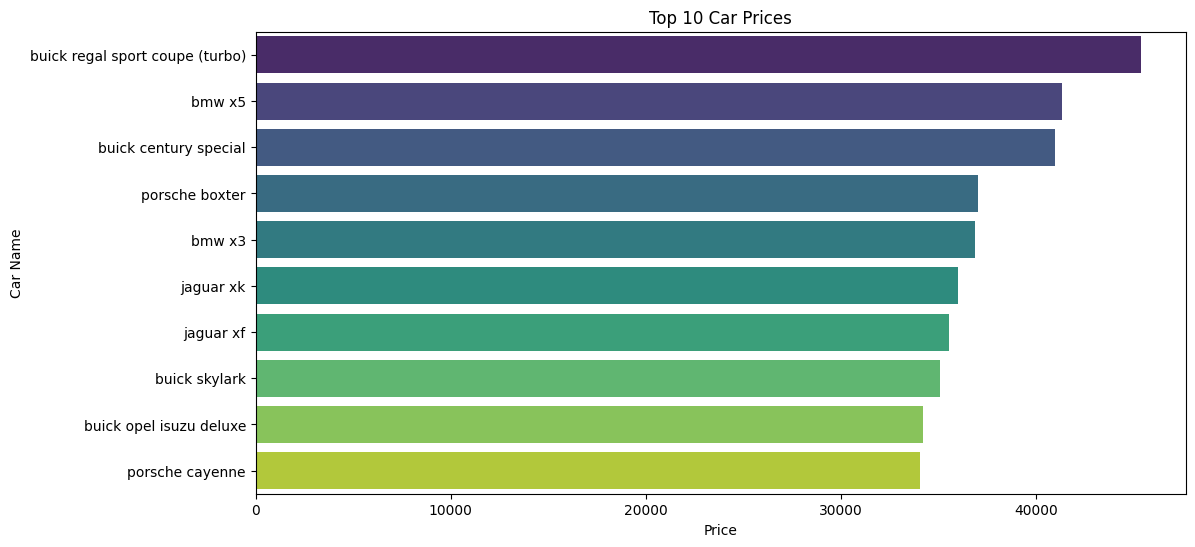

In [ ]:
# Sort the DataFrame by 'price' in descending order
df_sorted = df.sort_values(by='price', ascending=False)

# Select the top 10 rows
top_10_cars = df_sorted.head(10)

# Create the barplot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='CarName', data=top_10_cars, palette='viridis')


# Optional: Customize the plot
plt.title('Top 10 Car Prices')
plt.xlabel('Price')
plt.ylabel('Car Name')

# Show the plot
plt.show()

<Axes: xlabel='symboling', ylabel='price'>

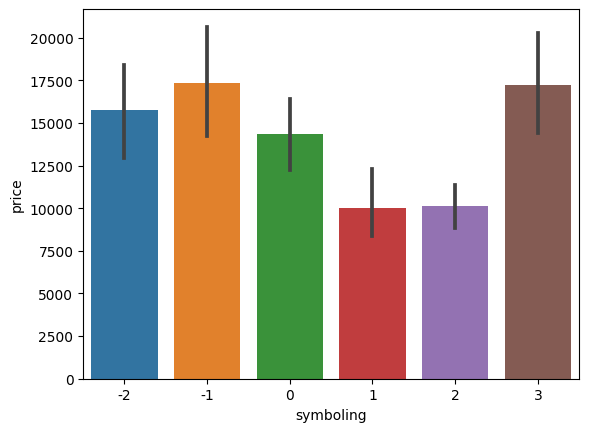

In [ ]:
sns.barplot(df,x='symboling',y='price')

In [ ]:
# Separate categorical and numerical column names
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

print("Categorical Column Names:")
print(categorical_columns)

print("\nNumerical Column Names:")
print(numerical_columns)

Categorical Column Names:
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Numerical Column Names:
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


## **Categorical Variable Distribution**

<Axes: xlabel='enginetype', ylabel='count'>

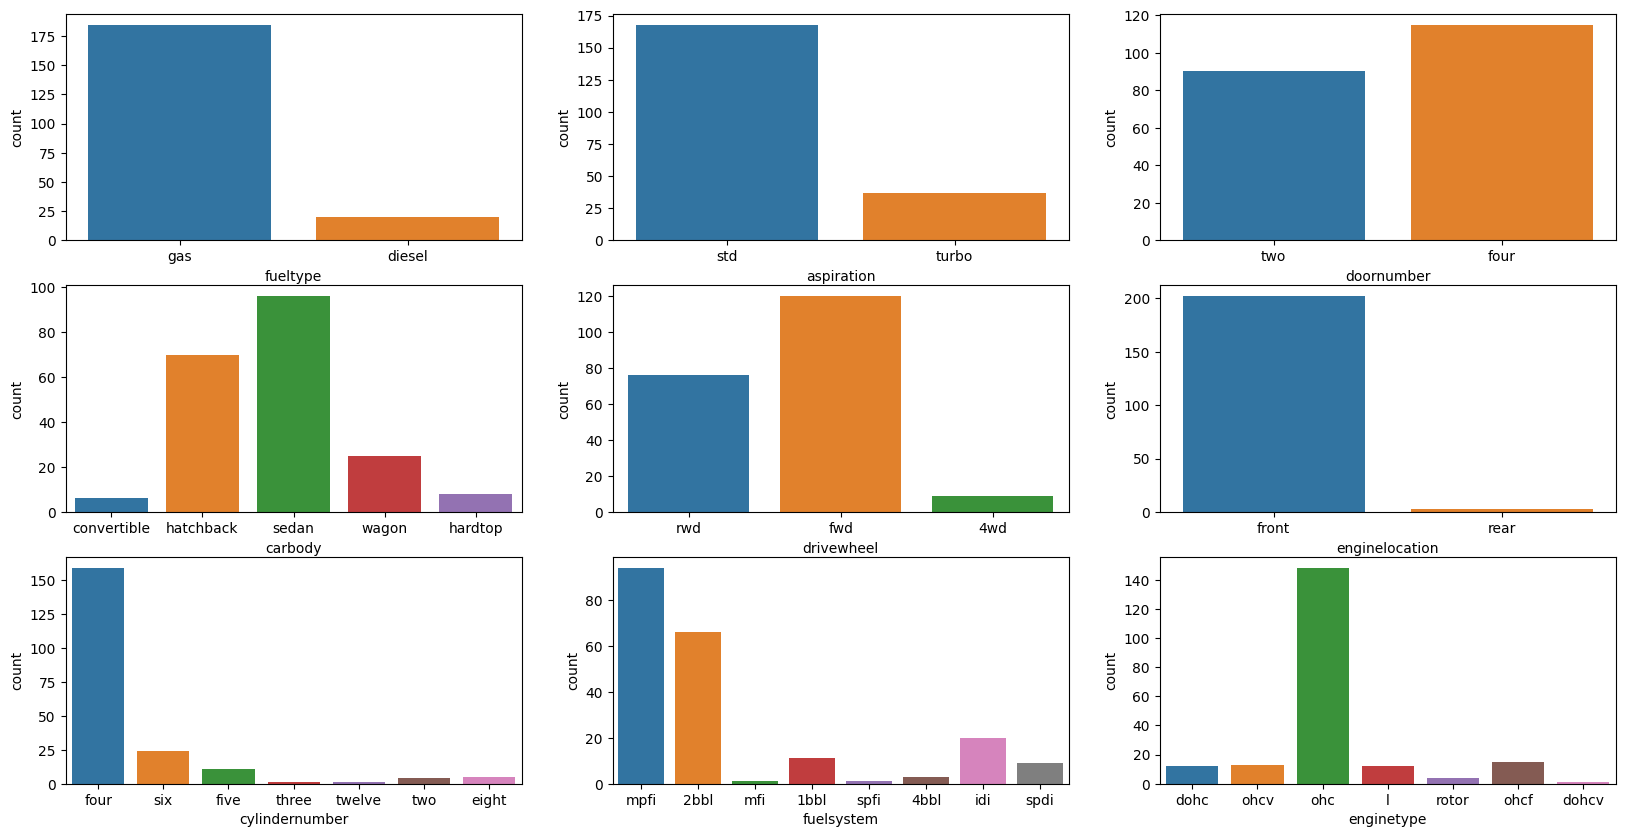

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(20, 10))
sns.countplot(x = 'fueltype', data = df, ax = ax[0,0])
sns.countplot(x = 'aspiration', data = df, ax = ax[0,1])
sns.countplot(x = 'doornumber', data = df, ax = ax[0,2])
sns.countplot(x = 'carbody', data = df, ax = ax[1,0])
sns.countplot(x = 'drivewheel', data = df, ax = ax[1,1])
sns.countplot(x = 'enginelocation', data = df, ax = ax[1,2])
sns.countplot(x = 'cylindernumber', data = df, ax = ax[2,0])
sns.countplot(x = 'fuelsystem', data = df, ax = ax[2,1])
sns.countplot(x = 'enginetype', data = df, ax = ax[2,2])


## **Some Numerical Variable Distribution**

<Axes: xlabel='symboling', ylabel='count'>

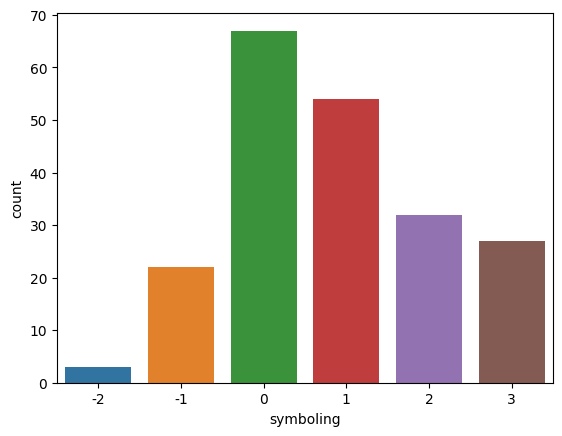

In [ ]:
sns.countplot(x = 'symboling', data = df)

<Axes: xlabel='citympg', ylabel='count'>

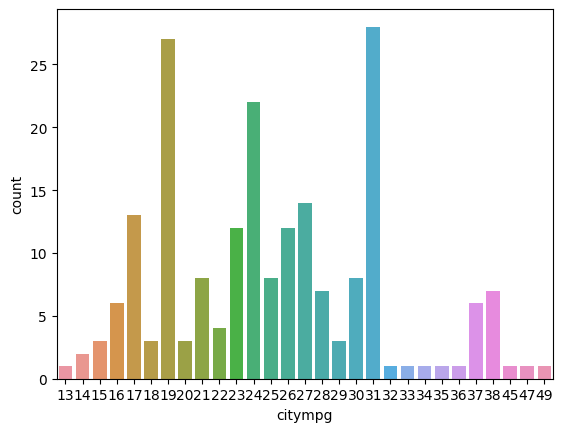

In [ ]:

sns.countplot(x = 'citympg', data = df)

<Axes: xlabel='highwaympg', ylabel='count'>

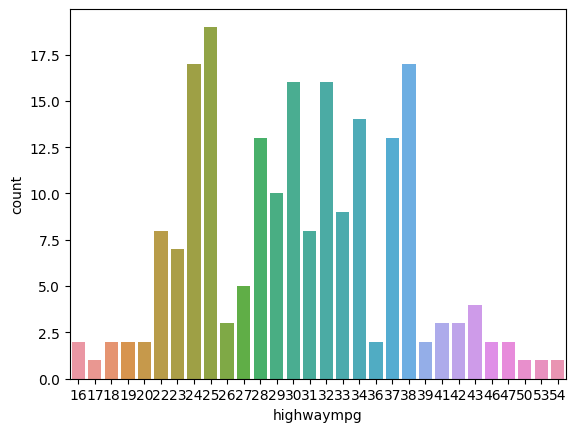

In [ ]:
sns.countplot(x = 'highwaympg', data = df)

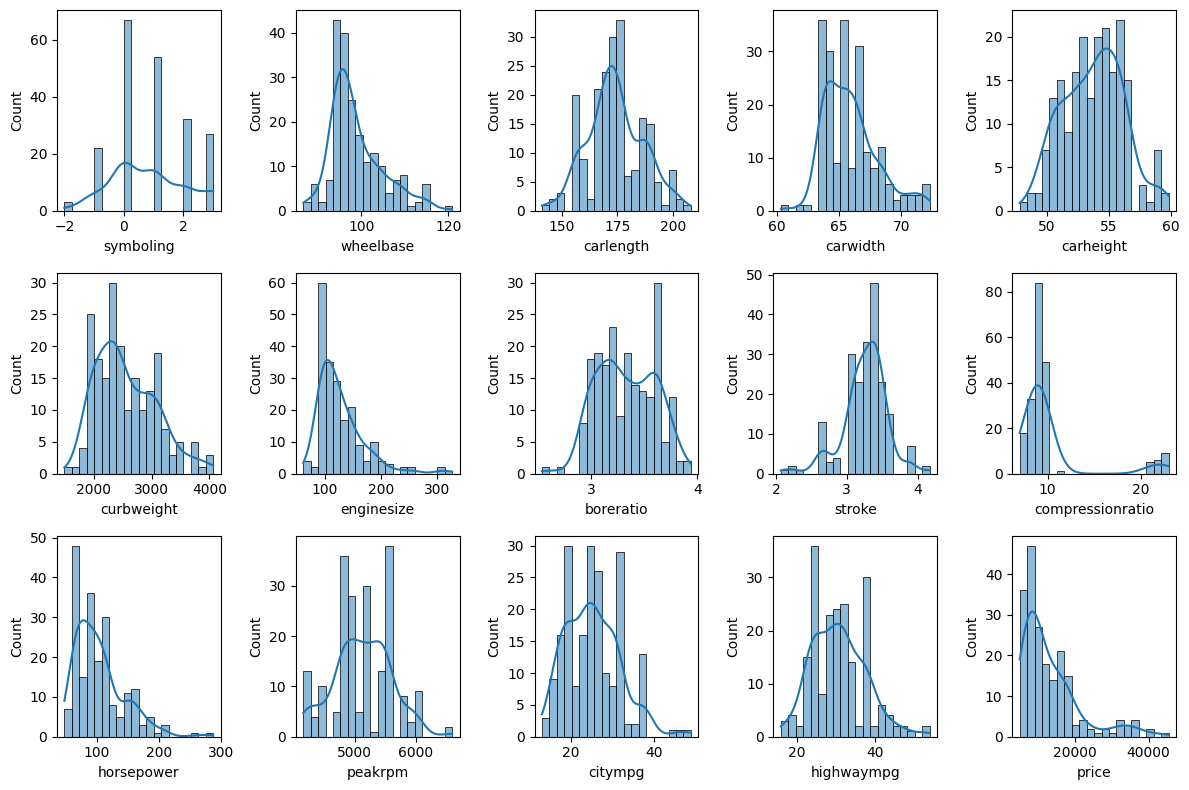

In [ ]:
numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    #sns.histplot(df[feature])
plt.tight_layout()
plt.show()

## **Categorical to Numerical**

In [ ]:
for col in categorical_columns:
  print(f"Category in {col} is : {df[col].unique()}")


Category in CarName is : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick sk

In [ ]:

df['fueltype']=df['fueltype'].map({'gas':0,'diesel':1})
df['aspiration']=df['aspiration'].map({'std':0,'turbo':1})
df['doornumber']=df['doornumber'].map({'two':0,'four':1})
df['carbody']=df['carbody'].map({'convertible':0,'hatchback':1,'sedan':2,'wagon':3,'hardtop':4})
df['drivewheel']=df['drivewheel'].map({'rwd':0,'fwd':1,'4wd':2})
df['enginelocation']=df['enginelocation'].map({'front':0,'rear':1})
df['enginetype']=df['enginetype'].map({'dohc':0,'ohcv':1,'ohc':2,'l':3,'rotor':4,'ohcf':5,'dohcv':6})
df['cylindernumber']=df['cylindernumber'].map({'four':0,'six':1,'five':2,'three':3,'twelve':4,'two':5,'eight':6})
df['fuelsystem']=df['fuelsystem'].map({'mpfi':0,'2bbl':1,'mfi':2,'1bbl':3,'spfi':4,'4bbl':5,'idi':6,'spdi':7})

In [ ]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0


## **Label Encoding**

In [ ]:
# for CarName categorical Column.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CarName']=le.fit_transform(df['CarName'])


In [ ]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0


In [ ]:
col_name_list = df.columns.tolist()
col_name_list


['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## **Outliers**

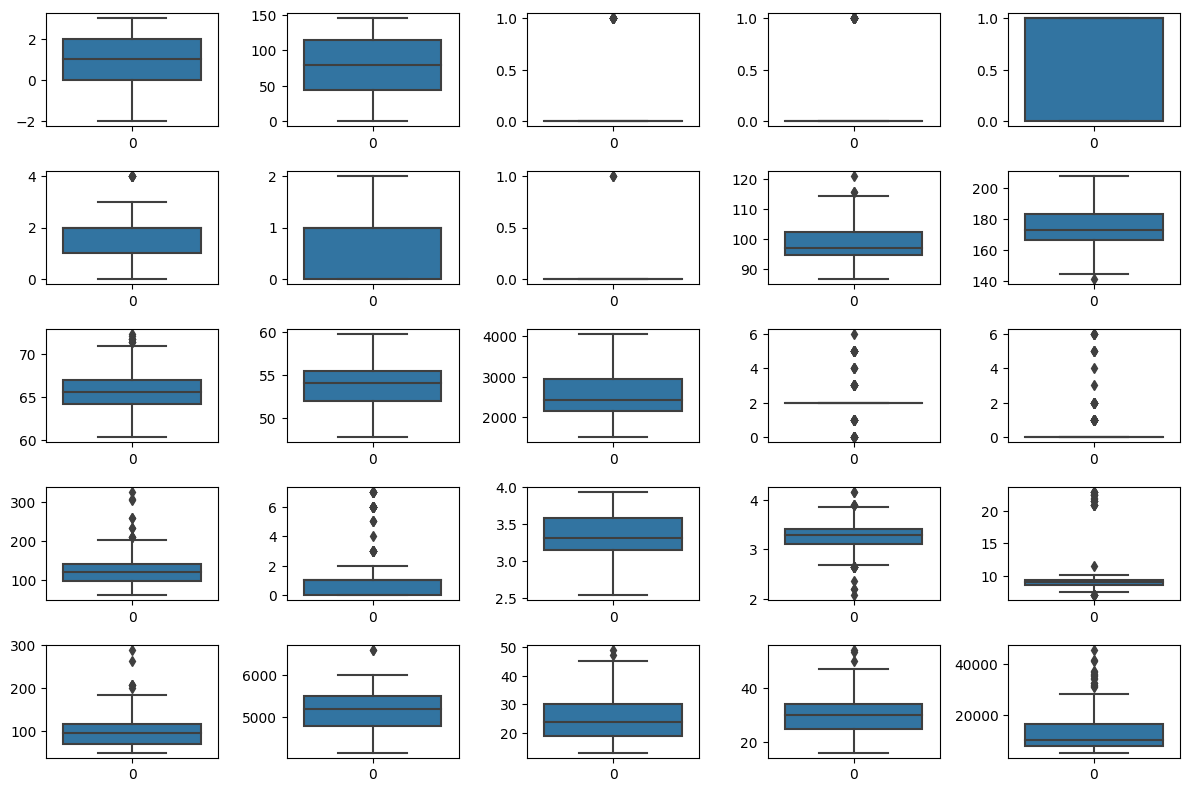

In [ ]:
plt.figure(figsize=(12, 8))
for feature in col_name_list:
    plt.subplot(5, 5, col_name_list.index(feature) + 1)
    sns.boxplot(data=df[feature])
plt.tight_layout()
plt.show()


In [ ]:
# Define the columns you want to check for outliers
columns_to_check = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Create a copy of the original DataFrame
cleaned_data = df.copy()

# Loop through the selected columns
for column in columns_to_check:
    # Calculate the first quartile (25th percentile)
    q25 = np.percentile(cleaned_data[column], 25)

    # Calculate the third quartile (75th percentile)
    q75 = np.percentile(cleaned_data[column], 75)

    # Calculate the IQR (Interquartile Range)
    IQR = q75 - q25

    # Define the lower and upper bounds for outliers
    lower_bound = q25 - 1.5 * IQR
    upper_bound = q75 + 1.5 * IQR

    # Replace outliers with the mean value of the column
    cleaned_data[column] = np.where((cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound),
                                    cleaned_data[column].mean(),
                                    cleaned_data[column])

# Display the DataFrame with outliers replaced by mean
print("Data with outliers replaced by mean:")
display(cleaned_data)


Data with outliers replaced by mean:


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,88.6,168.8,...,130.0,0.000000,3.47,2.68,9.000000,111.0,5000.0,21.0,27.0,13495.0
1,3.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,88.6,168.8,...,130.0,0.000000,3.47,2.68,9.000000,111.0,5000.0,21.0,27.0,16500.0
2,1.0,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,94.5,171.2,...,152.0,0.000000,2.68,3.47,9.000000,154.0,5000.0,19.0,26.0,16500.0
3,2.0,4.0,0.000000,0.000000,1.0,2.0,1.0,0.0,99.8,176.6,...,109.0,0.000000,3.19,3.40,10.000000,102.0,5500.0,24.0,30.0,13950.0
4,2.0,5.0,0.000000,0.000000,1.0,2.0,2.0,0.0,99.4,176.6,...,136.0,0.000000,3.19,3.40,8.000000,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,139.0,0.000000,0.000000,1.0,2.0,0.0,0.0,109.1,188.8,...,141.0,0.000000,3.78,3.15,9.500000,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,138.0,0.000000,0.180488,1.0,2.0,0.0,0.0,109.1,188.8,...,141.0,0.000000,3.78,3.15,8.700000,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,140.0,0.000000,0.000000,1.0,2.0,0.0,0.0,109.1,188.8,...,173.0,0.000000,3.58,2.87,8.800000,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,142.0,0.097561,0.180488,1.0,2.0,0.0,0.0,109.1,188.8,...,145.0,1.478049,3.01,3.40,10.142537,106.0,4800.0,26.0,27.0,22470.0


In [ ]:
# Separate the target variable (dependent) and features (independent)
X = df.drop(columns=['price'])  # Replace 'target_variable' with your target column
y = df['price']

## **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((143, 24), (62, 24))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## **Model**

In [ ]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'K-NN Regressor': KNeighborsRegressor()
}

In [ ]:
# Initialize dictionaries to store metrics for training and testing
train_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R-squared': []}
test_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R-squared': []}

In [ ]:
# Loop through each regression model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = model.predict(X_train)

    # Predictions on the testing set
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate metrics for testing data
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    # Store metrics in dictionaries
    train_metrics['Model'].append(model_name)
    train_metrics['MAE'].append(mae_train)
    train_metrics['MSE'].append(mse_train)
    train_metrics['RMSE'].append(rmse_train)
    train_metrics['R-squared'].append(r2_train)

    test_metrics['Model'].append(model_name)
    test_metrics['MAE'].append(mae_test)
    test_metrics['MSE'].append(mse_test)
    test_metrics['RMSE'].append(rmse_test)
    test_metrics['R-squared'].append(r2_test)


In [ ]:
# Create DataFrames to display the metrics
train_metrics_df = pd.DataFrame(train_metrics)
test_metrics_df = pd.DataFrame(test_metrics)

# Display metrics for training data
print("Metrics on Training Data:")
print(train_metrics_df)

# Display metrics for testing data
print("\nMetrics on Testing Data:")
print(test_metrics_df)

Metrics on Training Data:
                         Model          MAE           MSE         RMSE  \
0            Linear Regression  1639.940913  4.891877e+06  2211.758784   
1             Ridge Regression  1640.406109  4.916118e+06  2217.232016   
2             Lasso Regression  1640.120713  4.892649e+06  2211.933310   
3      Decision Tree Regressor     0.000000  0.000000e+00     0.000000   
4      Random Forest Regressor   549.521608  7.140545e+05   845.017442   
5  Gradient Boosting Regressor   344.711532  2.211890e+05   470.307335   
6               K-NN Regressor  1864.644755  8.729257e+06  2954.531648   

   R-squared  
0   0.919739  
1   0.919341  
2   0.919726  
3   1.000000  
4   0.988285  
5   0.996371  
6   0.856779  

Metrics on Testing Data:
                         Model          MAE           MSE         RMSE  \
0            Linear Regression  1948.501513  9.613474e+06  3100.560297   
1             Ridge Regression  1926.934109  9.314534e+06  3051.972139   
2            

## **The Random Forest Regressor stands out as the best performer with the lowest prediction errors (MAE, MSE, RMSE) and the highest R-squared (R2) value of approximately 93.92% among all models tested.**

## **Hyperparameter Tunning On Random Forest Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(X_train, y_train)

# Evaluate on test data
y_pred_grid = best_rf_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_grid)
mae = mean_absolute_error(y_test, y_pred_grid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_grid)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Mean Squared Error (MSE): 3952710.5609065117
Mean Absolute Error (MAE): 1388.2780291798651
Root Mean Squared Error (RMSE): 1988.1424900913194
R-squared (R2) Score: 0.942949469416716


## **Hyperparameter tuning improved model accuracy, achieving an R-squared (R2) score of 94.29% with lower errors.**

In [ ]:
import pickle

In [ ]:
filename="Car_Price.sav"
pickle.dump(rf_regressor,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('Car_Price.sav','rb'))

In [ ]:
import joblib

# Save the scaler object to a file
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({
    'symboling': [3],
    'CarName': [2],
    'fueltype': [0],
    'aspiration': [0],
    'doornumber': [0],
    'carbody': [0],
    'drivewheel': [0],
    'enginelocation': [0],
    'wheelbase': [88.6],
    'carlength': [168.8],
    'carwidth': [64.1],
    'carheight': [48.8],
    'curbweight': [2548],
    'enginetype': [0],
    'cylindernumber': [0],
    'enginesize': [130],
    'fuelsystem': ['0'],
    'boreratio': [3.47],
    'stroke': [2.68],
    'compressionratio': [9.0],
    'horsepower': [111],
    'peakrpm': [5000],
    'citympg': [21],
    'highwaympg': [27]
  })

# Apply the same preprocessing (standardization) to new data
new_data_scaled = sc.transform(new_data)

rf_regressor.fit(X_train, y_train)

# Make predictions on the standardized new data
predicted_sales = rf_regressor.predict(new_data_scaled)

# Display the predicted sales
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 14533.67
